# Caso Práctico

## Tratamiento del csv Churn_Modelling

Vamos a hacer un EDA (Análisis Exploratorio de Datos)


In [2]:
import pandas as pd
fichero1= 'Churn_Modelling.csv'
df=pd.read_csv(fichero1)

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.drop(["RowNumber","CustomerId","Surname"],1, inplace=True)
df.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [6]:
df['Geography']= pd.Categorical(df['Geography'])
df['Gender']= pd.Categorical(df['Gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [7]:
gender_dummy = pd.get_dummies(df['Gender'], prefix='Gender')
df = pd.concat([df,gender_dummy], axis=1)

df = df.drop(['Gender'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Age              10000 non-null  int64   
 3   Tenure           10000 non-null  int64   
 4   Balance          10000 non-null  float64 
 5   NumOfProducts    10000 non-null  int64   
 6   HasCrCard        10000 non-null  int64   
 7   IsActiveMember   10000 non-null  int64   
 8   EstimatedSalary  10000 non-null  float64 
 9   Exited           10000 non-null  int64   
 10  Gender_Female    10000 non-null  uint8   
 11  Gender_Male      10000 non-null  uint8   
dtypes: category(1), float64(2), int64(7), uint8(2)
memory usage: 732.7 KB


In [8]:
df

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,Germany,42,3,75075.31,2,1,0,92888.52,1,0,1


In [9]:
df['Geography']=df['Geography'].cat.codes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int8   
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  Gender_Female    10000 non-null  uint8  
 11  Gender_Male      10000 non-null  uint8  
dtypes: float64(2), int64(7), int8(1), uint8(2)
memory usage: 732.5 KB


In [11]:
# Mostrar los valores nulos
df.isnull().sum()

CreditScore        0
Geography          0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Gender_Female      0
Gender_Male        0
dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


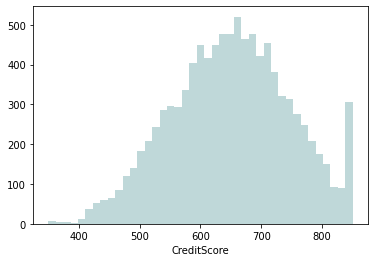

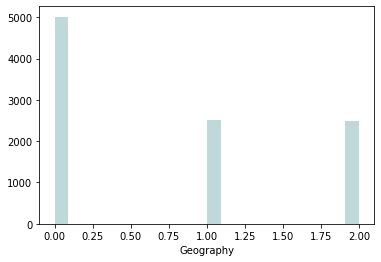

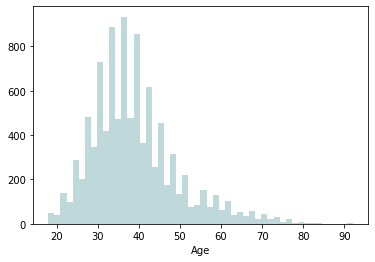

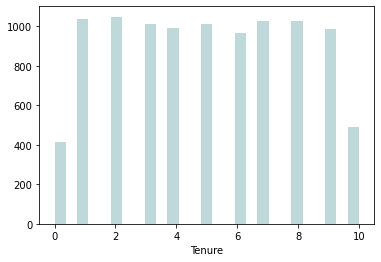

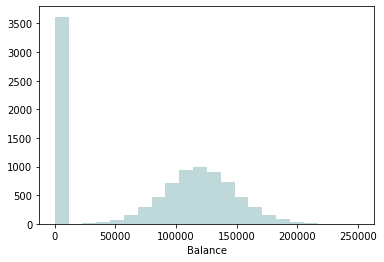

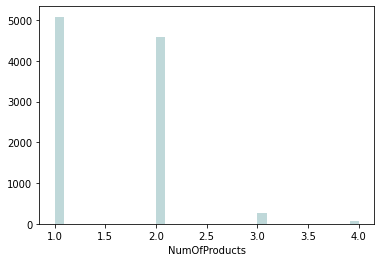

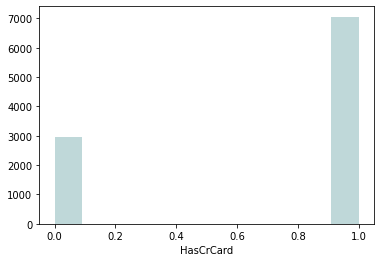

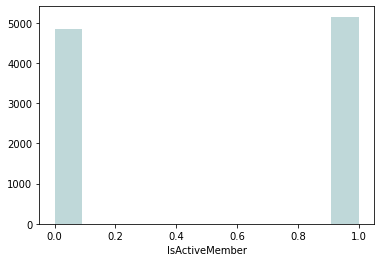

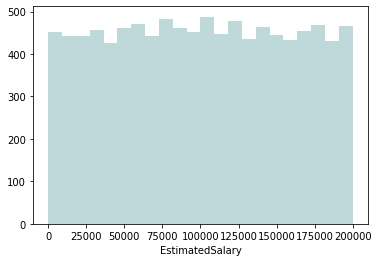

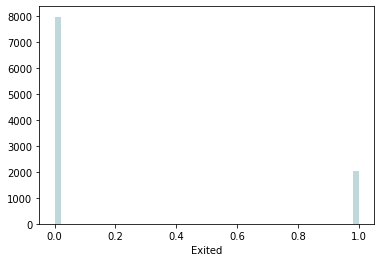

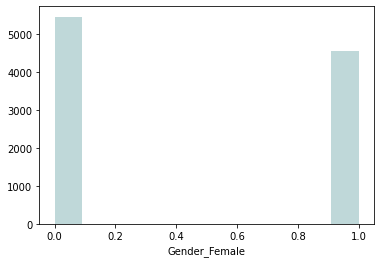

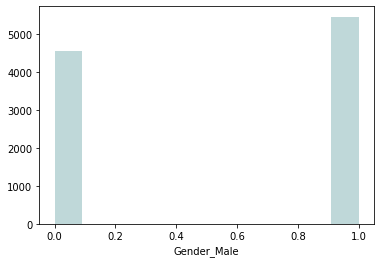

In [13]:
for columna in df.columns:
    sns.distplot(a=df[columna], color = "cadetblue", kde = False)
    plt.show()

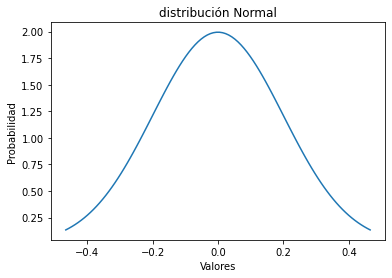

In [14]:
import scipy
from scipy import stats
#graficando normal
mu, sigma = 0, 0.2 # media y desvio estándar
normal = stats.norm(mu,sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99),100)
fp=normal.pdf(x) #Función de probabilidad
plt.plot(x, fp)
plt.title('distribución Normal')
plt.ylabel('Probabilidad')
plt.xlabel('Valores')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


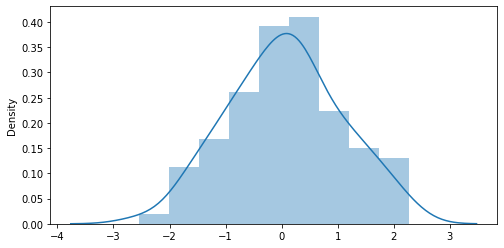

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

plt.figure(figsize=(8,4))



np.random.seed( 0 ) 
x = np.random.randn( 100 ) 
x
ax = sns.distplot(x) 
plt.show()


In [19]:
from scipy.stats import shapiro
for columna_numerica in df.columns:
    #Aplicamos saphiro
    stat,p = shapiro(df[columna_numerica])
    print('Valor de test=%.3f, p-value=%.3f' % (stat,p))
    #Interpretación de resultados
    alpha= 0.05
    if p>alpha:
      print('La variable ',columna_numerica, ' proviene de una distribución normal (no rechazamos H0) \n')
    else:
      print('La variable ',columna_numerica, ' NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 \n')


Valor de test=0.994, p-value=0.000
La variable  CreditScore  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.747, p-value=0.000
La variable  Geography  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.944, p-value=0.000
La variable  Age  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.949, p-value=0.000
La variable  Tenure  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.846, p-value=0.000
La variable  Balance  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.706, p-value=0.000
La variable  NumOfProducts  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.572, p-value=0.000
La variable  HasCrCard  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.636, p-value=0.000
La variable  IsActiveMember  NO provien

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df =scaler.fit_transform(df)


In [21]:
df

array([[-0.32622142, -0.90188624,  0.29351742, ...,  1.97716468,
         1.09598752, -1.09598752],
       [-0.44003595,  1.51506738,  0.19816383, ..., -0.50577476,
         1.09598752, -1.09598752],
       [-1.53679418, -0.90188624,  0.29351742, ...,  1.97716468,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.90188624, -0.27860412, ...,  1.97716468,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.30659057,  0.29351742, ...,  1.97716468,
        -0.91241915,  0.91241915],
       [ 1.46377078, -0.90188624, -1.04143285, ..., -0.50577476,
         1.09598752, -1.09598752]])

In [22]:
df.size

120000